In [ ]:
# check if er're using a GPU
!nvidia-smi

Sat Jul  6 14:34:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0              30W /  70W |   4221MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-06 14:34:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-06 14:34:50 (96.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data,walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2024-07-06 14:34:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   210MB/s    in 0.8s    

2024-07-06 14:34:51 (210 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
train_dir='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode='categorical',
                                                                          batch_size=BATCH_SIZE
                                                                          )

test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                         image_size=IMG_SIZE,
                                                                         label_mode='categorical',
                                                                         batch_size=BATCH_SIZE)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[2.13627548e+02 2.34984695e+02 1.90913269e+02]
   [2.19000015e+02 2.40000015e+02 1.98193878e+02]
   [2.19076523e+02 2.37841827e+02 1.99153061e+02]
   ...
   [7.89949036e+01 6.43521118e+01 5.35663795e+01]
   [7.69132996e+01 6.29133034e+01 4.99133034e+01]
   [7.61477890e+01 6.21477928e+01 4.91477928e+01]]

  [[2.13836746e+02 2.29979599e+02 1.93693878e+02]
   [2.15923477e+02 2.32066330e+02 1.95051025e+02]
   [2.15969391e+02 2.31571426e+02 1.94770416e+02]
   ...
   [7.92449188e+01 6.33571625e+01 5.03571625e+01]
   [8.23417816e+01 6.92754593e+01 5.34744339e+01]
   [7.98368759e+01 6.68368759e+01 5.05052147e+01]]

  [[1.92469376e+02 2.02250000e+02 1.72821426e+02]
   [2.11433670e+02 2.22061234e+02 1.88076538e+02]
   [2.18729584e+02 2.30255096e+02 1.91015305e+02]
   ...
   [9.20254745e+01 7.45969467e+01 5.88112068e+01]
   [8.05000000e+01 6.75153122e+01 4.99285469e+01]
   [7.54998245e+01 6.29283981e+01 4.32855415e+01]]

  ...

  [[2.04801025e+02 2.16795944e+02 1.73158234e+02]
   [2

In [ ]:
# 1. create base model with tf.keras.application
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model(so the underlying pre_trained patterns aren't updated)
base_model.trainable=False

# 3. create inputs into our model
inputs=tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. if using model like ResNet50V2 you will need to normalize inputs( you dont have to for EfficientNet(s))
# x=tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. pass the inputs to the base_model
x= base_model(inputs)
print(f"shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model( aggreate all the most important information, reduce number of computations)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"shape after globalaveragepooling2D: {x.shape}")

# 7. create output activation layer
outputs=tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8. combine inputs and outputs into a model
model_0=tf.keras.Model(inputs,outputs)

# 9. compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 10. fit the model and save its history
history_10_percent=model_0.fit(train_data_10_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_10_percent),
                               validation_data=test_data_10_percent,
                               validation_steps=int(0.25* len(test_data_10_percent)),
                               callbacks=[create_tensorboard_callback(dir_name='transfer learning',
                                                                      experiment_name="10_percent_feature_extraction")])



shape after passing inputs through base model: (None, 7, 7, 1280)
shape after globalaveragepooling2D: (None, 1280)
Saving TensorBoard log files to: transfer learning/10_percent_feature_extraction/20240706-143505
Epoch 1/5
24/24 [==============================] - 16s 243ms/step - loss: 1.8544 - accuracy: 0.4280 - val_loss: 1.2593 - val_accuracy: 0.7401
Epoch 2/5
24/24 [==============================] - 4s 147ms/step - loss: 1.0850 - accuracy: 0.7747 - val_loss: 0.8483 - val_accuracy: 0.8125
Epoch 3/5
24/24 [==============================] - 4s 174ms/step - loss: 0.7909 - accuracy: 0.8213 - val_loss: 0.7031 - val_accuracy: 0.8289
Epoch 4/5
24/24 [==============================] - 4s 174ms/step - loss: 0.6346 - accuracy: 0.8533 - val_loss: 0.5871 - val_accuracy: 0.8569
Epoch 5/5
24/24 [==============================] - 5s 186ms/step - loss: 0.5415 - accuracy: 0.8813 - val_loss: 0.5550 - val_accuracy: 0.8586


In [ ]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 5s 61ms/step - loss: 0.5517 - accuracy: 0.8608


[0.5517430901527405, 0.86080002784729]

In [ ]:
# check the layers in the base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_4
1 rescaling_6
2 normalization_3
3 rescaling_7
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, None, None, 3)        0         ['input_4[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, None, None, 3)        7         ['rescaling_6[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_7 (Rescaling)     (None, None, None, 3)        0         ['normalization_3

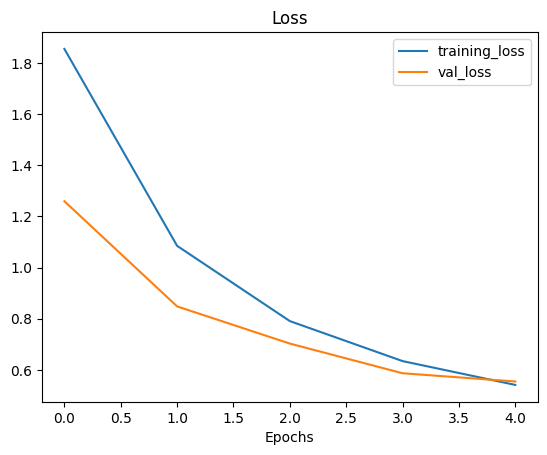

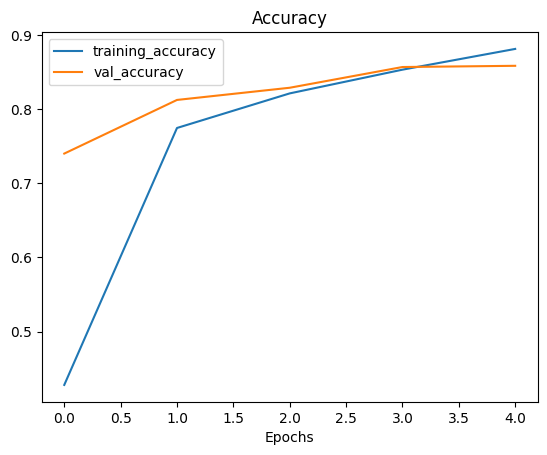

In [ ]:
plot_loss_curves(history_10_percent)

***Getting a feature vector from a trained model***

let's demonstrate the Global pooling 2D layer..
wehave a tensor after our model goes through base_model of shape(None,7,7,1280).
bute when it passes through GlobalAveragePooling2D, it turn into (None,1280).
let's use a similar shaped tensor of(1,4,4,3) and the pass it to GlobalAveragePooling2D.

In [ ]:
# define the input tensor
input_shape=(1,4,4,3)

# create a random tensor
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(f"random input tensor:\n {input_tensor}\n")

# pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooles random tensor:\n {global_average_pooled_tensor.shape}\n")

# check the different tensors
print(f'shape of input tensor: {input_tensor.shape}')
print(f"shape of the pooled tensor: {global_average_pooled_tensor.shape}")

random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooles random tensor:
 (1, 3)

shape of input tensor: (1, 4, 4, 3)
shape of the pooled tensor: (1, 3)


In [ ]:
# let's replicate the GlobalAveragePool2D
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

**Running a series of transfer learning experiments.**

1. model_1 - use feature extraction transfer learning with 1% of the training data with data augmentation

#Getting and preprocessing data for model_1

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2024-07-06 14:35:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   195MB/s    in 0.7s    

2024-07-06 14:35:54 (195 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
# creating training and test directories
train_dir='10_food_classes_1_percent/train'
test_dir='10_food_classes_1_percent/test'

In [ ]:
# how many images are we working with?
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There a

In [ ]:
# set up data loaders
IMG_size=(224,224)
train_data_1_percent= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                    label_mode='categorical',
                                                                    image_size=IMG_SIZE,
                                                                    batch_size=BATCH_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                        label_mode='categorical',
                                                        image_size=IMG_SIZE,
                                                        batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#Adding data augmentation right to into the model
To add data augmentation right into our models, we can use the layers inside:
**tf.keras.layers.experimental.preprocessing()**
we can see the benefits of doing this within Tensorflow Data augmentation:
https://www.tensorflow.org/tutorials/images/data_augmentation#use_keras_preprocessing_layers

Preprocessing of imges (augmenting them) happens on the GPU (much faster) rather than the CPU.

Image data augmentation only happens during training, so we can still export our whole model and use it elsewhere

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# creating  data augmentation stage with horizontal flipping, rotation, zooms, etc
data_augmentation=keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
], name='data_augmentation')

#Visualize our data augmentation layer( and see what happens to our data)

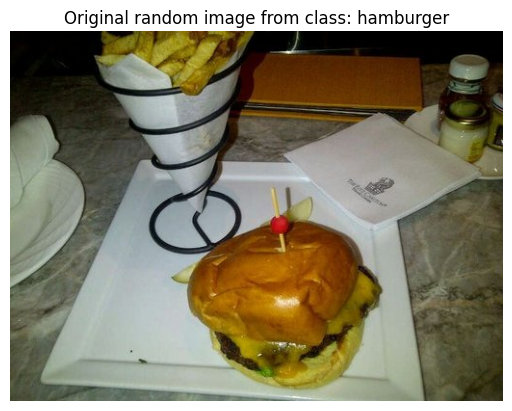

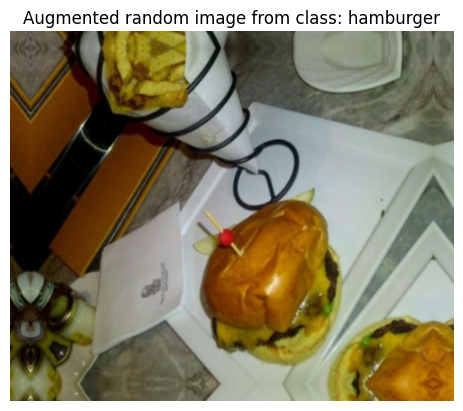

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class=random.choice(train_data_1_percent.class_names)
target_dir='10_food_classes_1_percent/train/'+ target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir +'/' + random_image

# read and plot in the random image
img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

# now lets plor our augmented random image
augmented_img=data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False);


#Model 1 : Feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
# setup input shape and base model, freezing the base model layers
input_shape=(224,224,3)
base_model= tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#create input layer
inputs= layers.Input(shape=input_shape, name='input_layer')

# Add in data augmentation Sequential model as a layer
x=data_augmentation(inputs)

# give the base_model the inputs( after augmentation ) and do not train it
x=base_model(x, training=False)

# pool output features of the base model
x=layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# put a dense layer on as the output
outputs=layers.Dense(10, activation='softmax', name='output_layer')(x)

# make a model using inputs and outputs
model_1=keras.Model(inputs, outputs)

# compile  the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1_percent=model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=len(test_data),
                              callbacks=[create_tensorboard_callback(dir_name='transfer learning',
                                                                     experiment_name='1_percent_data_aug')])

Saving TensorBoard log files to: transfer learning/1_percent_data_aug/20240706-143601
Epoch 1/5
3/3 [==============================] - 16s 4s/step - loss: 2.3931 - accuracy: 0.1429 - val_loss: 2.2091 - val_accuracy: 0.1668
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.1750 - accuracy: 0.2000 - val_loss: 2.0797 - val_accuracy: 0.2520
Epoch 3/5
3/3 [==============================] - 9s 4s/step - loss: 1.9318 - accuracy: 0.3571 - val_loss: 1.9665 - val_accuracy: 0.3440
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.7709 - accuracy: 0.5857 - val_loss: 1.8646 - val_accuracy: 0.4332
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.6173 - accuracy: 0.6714 - val_loss: 1.7715 - val_accuracy: 0.4884


In [ ]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [ ]:
# evaluate on full test dataset
results_1_percent_aug=model_1.evaluate(test_data)
results_1_percent_aug

79/79 [==============================] - 7s 78ms/step - loss: 1.7715 - accuracy: 0.4884


[1.7714990377426147, 0.48840001225471497]

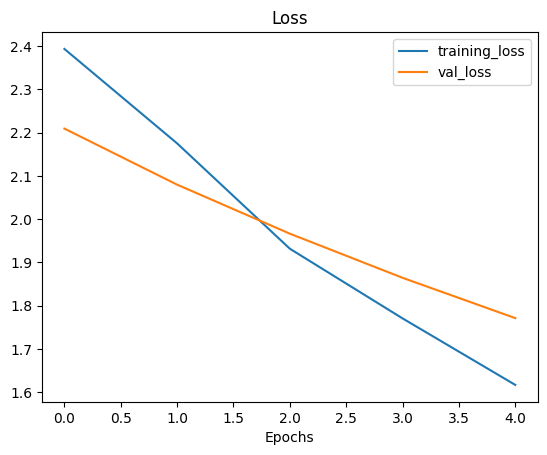

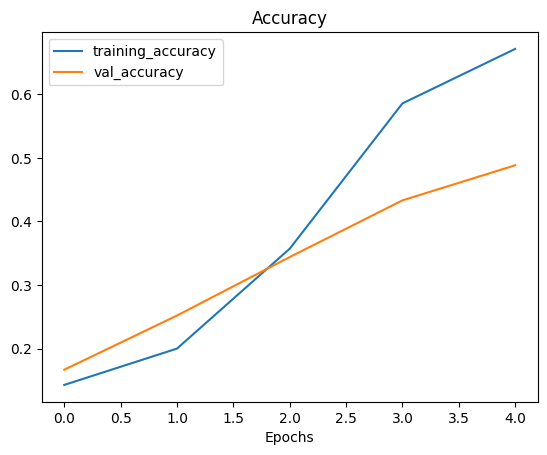

In [ ]:
# how do the model with 1% of the data and data augmentatoin loss curves look?
plot_loss_curves(history_1_percent)

#Model 2: feature extraction transfer learning model with 10% of the data and data augmentaion

In [ ]:
train_dir_10_percent='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [ ]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
# set data inputs
IMG_SIZE=(224,224)
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Create model 2with data augmentation built in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# build data augmentation layer
data_augmentation=Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
], name='data_augmentation')

# set up the input shape to our model
input_shape=(224,224,3)

# create frozen base model( also called the backbone)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# create the inputs and outputs ( including the layers in between)
inputs=layers.Input(shape=input_shape, name='input_layer')
x=data_augmentation(inputs)
x=base_model(x, training=False)
x=layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs=layers.Dense(10,activation='softmax', name='output_layer')(x)
model_2=keras.Model(inputs,outputs)

# Compile
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# Create a ModelCheckpoint callback
the ModelCheckpoint callback intemediately saves our model( the full model or just the weights) during training. this is useful so we can come and start where we left off.

In [ ]:
# set checkpoint path
checkpoint_path='ten_percent_model_checkpoints_weights/checkpoint.ckpt'

# create a ModelCheckpoint callback that saves teh model's weight only
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       save_freq='epoch', # saves every epoch
                                                       verbose=1)

# fit model 2 passing in the ModelCheckpoint callback

In [ ]:
# Fit teh model saving checkpoints every epoch
initial_epochs=5
history_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                        epochs=initial_epochs,
                                        validation_data=test_data,
                                        validation_steps=len(test_data),
                                        callbacks=[create_tensorboard_callback(dir_name='transfer learning',
                                                                               experiment_name='10_percent_data_aug'),
                                                                               checkpoint_callback])

Saving TensorBoard log files to: transfer learning/10_percent_data_aug/20240706-143701
Epoch 1/5
3/3 [==============================] - ETA: 0s - loss: 2.4349 - accuracy: 0.1143
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 17s 4s/step - loss: 2.4349 - accuracy: 0.1143 - val_loss: 2.2972 - val_accuracy: 0.1368
Epoch 2/5
3/3 [==============================] - ETA: 0s - loss: 2.0754 - accuracy: 0.2571
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 7s 3s/step - loss: 2.0754 - accuracy: 0.2571 - val_loss: 2.1585 - val_accuracy: 0.2020
Epoch 3/5
3/3 [==============================] - ETA: 0s - loss: 1.9633 - accuracy: 0.4000
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 8s 4s/step - loss: 1.9633 - accuracy: 0.4000 - val_loss: 2.0438 - val_accuracy: 0.2744
Epoch 4/5
3/3 [=========

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 79ms/step - loss: 0.5517 - accuracy: 0.8608


[0.55174320936203, 0.86080002784729]

In [ ]:
# check the model_2 results on all test data
results_10_percent_data_aug=model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 70ms/step - loss: 1.8475 - accuracy: 0.4240


[1.847475528717041, 0.42399999499320984]

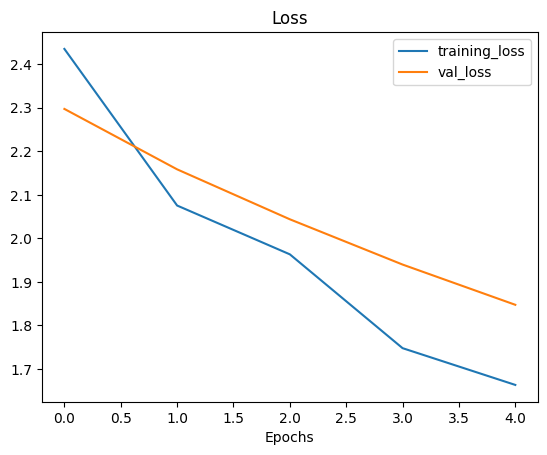

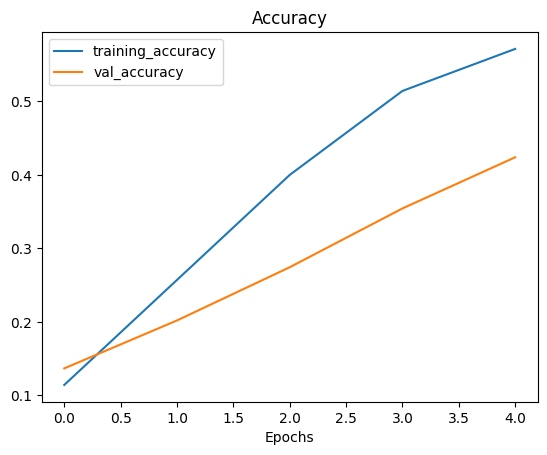

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

#loading in checkpointed weights
Loading in checkpointed weights returns a model to aspecific checkpoint.

In [ ]:
# load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

ValueError: Received incompatible tensor with shape (1280, 10) when attempting to restore variable with shape (1, 1, 1152, 48) and name Adam/m/block7a_se_reduce/kernel:0.

In [ ]:
loaded_weights_model_results=model_2.evaluate(test_data)

79/79 [==============================] - 5s 64ms/step - loss: 1.8475 - accuracy: 0.4240


In [ ]:
results_10_percent_data_aug==loaded_weights_model_results

False

In [ ]:
results_10_percent_data_aug

[1.847475528717041, 0.42399999499320984]

In [ ]:
loaded_weights_model_results

[1.8474754095077515, 0.42399999499320984]

In [ ]:
# check to see if the loaded model results are very close to our previous non_loaded model results
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [ ]:
# check the difference between the two results
print(np.array(results_10_percent_data_aug)- np.array(loaded_weights_model_results))

[1.1920929e-07 0.0000000e+00]


# Model 3: Fine-tuning an existing model on 10% of the data
***Note:*** Fine-tuning usually works best after training a feature extraction model for few epochs with large amounts of custome data.

In [ ]:
# laeyers in loaded model
model_2.layers

In [ ]:
# are these layers trainble?
for layer in model_2.layers:
  print(layer,layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7a889763d990> True
<keras.src.engine.sequential.Sequential object at 0x7a88976afc40> True
<keras.src.engine.functional.Functional object at 0x7a8897267640> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7a88976d4f40> True
<keras.src.layers.core.dense.Dense object at 0x7a88973e66e0> True


In [ ]:
# what layers are in our base model( EfficientNetB0) and are they trainable?
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_6 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [ ]:
# how many trainble variables are in our base model?
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
# to begin fine-tuning, let's first start by setting the last 10 layers of our base_model.trainable=true
base_model.trainable=True

# Freeze all layers except for teh last 10
for layer in base_model.layers[:-10]:
  layer.trainable=False

# recompile (we have to recompile our models every time we make changes)
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [ ]:
# now we've unfrozen some of the layers closer tto the top, how many trainable variables are there?
print(len(model_2.trainable_variables))

12


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs=initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_tune_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                         epochs=fine_tune_epochs,
                                         validation_data=test_data,
                                         validation_steps=int(0.25*len(test_data)),
                                         initial_epoch=history_10_percent_data_aug.epoch[-1],
                                         callbacks=[create_tensorboard_callback(dir_name='transfer_ learning',
                                                                                experiment_name='10_percent_fine_tune_last_10')]
)

Saving TensorBoard log files to: transfer_ learning/10_percent_fine_tune_last_10/20240706-143822
Epoch 5/10
3/3 [==============================] - 14s 3s/step - loss: 1.4944 - accuracy: 0.6714 - val_loss: 1.1213 - val_accuracy: 0.7089
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.5059 - accuracy: 0.8857 - val_loss: 0.9249 - val_accuracy: 0.7336
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.1952 - accuracy: 0.9714 - val_loss: 1.0349 - val_accuracy: 0.6513
Epoch 8/10
3/3 [==============================] - 4s 2s/step - loss: 0.1278 - accuracy: 0.9571 - val_loss: 1.0452 - val_accuracy: 0.6760
Epoch 9/10
3/3 [==============================] - 4s 2s/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 1.0579 - val_accuracy: 0.6826
Epoch 10/10
3/3 [==============================] - 4s 2s/step - loss: 0.0600 - accuracy: 0.9571 - val_loss: 1.1033 - val_accuracy: 0.6711


In [ ]:
# Evaluate the fine-tuned model (model_3 which is actually model_2 fined-tuned for another 5 epochs)
results_fine_tune_10_percent=model_2.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 1.0983 - accuracy: 0.6724


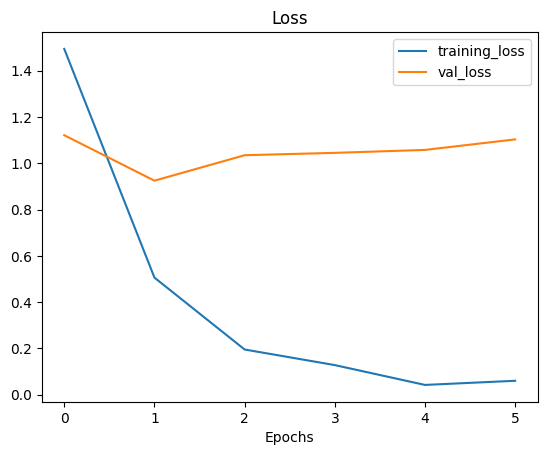

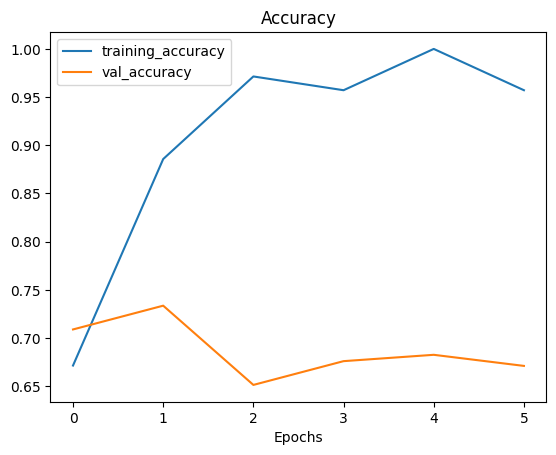

In [ ]:
plot_loss_curves(history_fine_tune_10_percent_data_aug)

In [ ]:
# lets create a function to compare training histories
def compare_history(original_history,  new_history, initial_epochs=5):
  '''
  compare two tensorflow history objects
  '''
  # get original history measurements
  acc=original_history.history['accuracy']
  loss=original_history.history['loss']

  val_acc=original_history.history['val_accuracy']
  val_loss=original_history.history['val_loss']

  # Combine original history metrics with new_history metrics
  total_acc=acc + new_history.history['accuracy']
  total_loss=acc + new_history.history['loss']

  total_val_acc=val_acc + new_history.history['val_accuracy']
  total_val_loss=val_loss + new_history.history['val_loss']

  # make plot for accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label='training Accuracy')
  plt.plot(total_val_acc,label='val accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='start fine tuning')
  plt.legend(loc='lower right')
  plt.title('training and validation accuracy')

  # make plot for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label='training loss')
  plt.plot(total_val_loss, label='val loss')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='start fine tuning')
  plt.legend(loc="upper right")
  plt.title('training and validation loss')

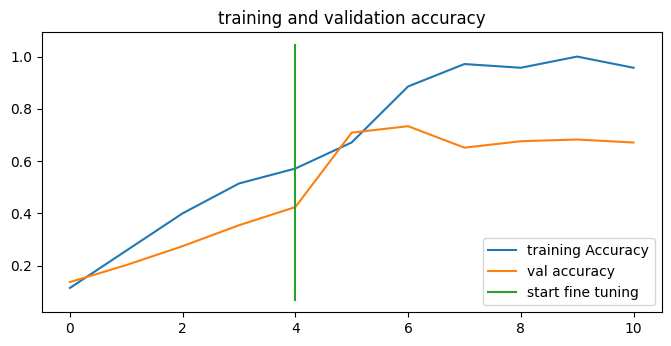

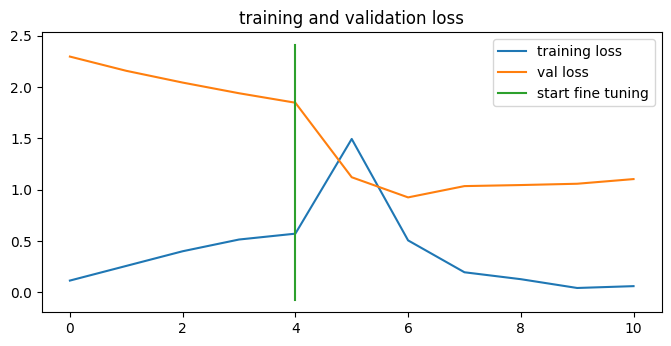

In [ ]:
compare_history(history_10_percent_data_aug, history_fine_tune_10_percent_data_aug, initial_epochs=5)

# Model 4: Fine_tuning and existing model of all the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2024-07-06 14:39:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   194MB/s    in 2.5s    

2024-07-06 14:39:09 (194 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
# setup training and test dir
train_dir_all_data='10_food_classes_all_data/train'
test_dir='10_food_classes_all_data/test'

In [ ]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [ ]:
# set up data inputs
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10_classes_full=tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                               label_mode='categorical',
                                                                               image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=IMG_SIZE
                                                                               )

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 5s 63ms/step - loss: 1.0983 - accuracy: 0.6724


[1.0982660055160522, 0.6723999977111816]

In [ ]:
results_fine_tune_10_percent

[1.0982660055160522, 0.6723999977111816]

In [ ]:
model_2.load_weights(checkpoint_path)

ValueError: Received incompatible tensor with shape (1280, 10) when attempting to restore variable with shape (1, 1, 1152, 48) and name Adam/m/block7a_se_reduce/kernel:0.

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 1.8475 - accuracy: 0.4240


[1.847475528717041, 0.42399999499320984]